<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-the-dataset-and-explore-the-variables." data-toc-modified-id="Load-the-dataset-and-explore-the-variables.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load the dataset and explore the variables.</a></span></li><li><span><a href="#We-will-try-to-predict-variable-Churn-using-a-logistic-regression-on-variables-tenure,-SeniorCitizen,MonthlyCharges." data-toc-modified-id="We-will-try-to-predict-variable-Churn-using-a-logistic-regression-on-variables-tenure,-SeniorCitizen,MonthlyCharges.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.</a></span></li><li><span><a href="#Extract-the-target-variable." data-toc-modified-id="Extract-the-target-variable.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Extract the target variable.</a></span></li><li><span><a href="#Extract-the-independent-variables-and-scale-them." data-toc-modified-id="Extract-the-independent-variables-and-scale-them.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Extract the independent variables and scale them.</a></span></li><li><span><a href="#Build-the-logistic-regression-model." data-toc-modified-id="Build-the-logistic-regression-model.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Build the logistic regression model.</a></span></li><li><span><a href="#Evaluate-the-model." data-toc-modified-id="Evaluate-the-model.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Evaluate the model.</a></span></li><li><span><a href="#Even-a-simple-model-will-give-us-more-than-70%-accuracy.-Why?" data-toc-modified-id="Even-a-simple-model-will-give-us-more-than-70%-accuracy.-Why?-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Even a simple model will give us more than 70% accuracy. Why?</a></span></li><li><span><a href="#Synthetic-Minority-Oversampling-TEchnique-(SMOTE)-is-an-over-sampling-technique-based-on-nearest-neighbors-that-adds-new-points-between-existing-points.-Apply-imblearn.over_sampling.SMOTE-to-the-dataset.-Build-and-evaluate-the-logistic-regression-model.-Is-it-there-any-improvement?" data-toc-modified-id="Synthetic-Minority-Oversampling-TEchnique-(SMOTE)-is-an-over-sampling-technique-based-on-nearest-neighbors-that-adds-new-points-between-existing-points.-Apply-imblearn.over_sampling.SMOTE-to-the-dataset.-Build-and-evaluate-the-logistic-regression-model.-Is-it-there-any-improvement?-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?</a></span></li><li><span><a href="#Tomek-links-are-pairs-of-very-close-instances,-but-of-opposite-classes.-Removing-the-instances-of-the-majority-class-of-each-pair-increases-the-space-between-the-two-classes,-facilitating-the-classification-process.-Apply-imblearn.under_sampling.TomekLinks-to-the-dataset.-Build-and-evaluate-the-logistic-regression-model.-Is-it-there-any-improvement?" data-toc-modified-id="Tomek-links-are-pairs-of-very-close-instances,-but-of-opposite-classes.-Removing-the-instances-of-the-majority-class-of-each-pair-increases-the-space-between-the-two-classes,-facilitating-the-classification-process.-Apply-imblearn.under_sampling.TomekLinks-to-the-dataset.-Build-and-evaluate-the-logistic-regression-model.-Is-it-there-any-improvement?-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?</a></span></li></ul></div>

# Load the dataset and explore the variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
df=pd.read_csv('customer_churn.txt')
data=pd.read_csv('customer_churn.txt')

In [3]:
df=df.drop(['customerID'],axis=1)

In [4]:
df=df.drop_duplicates()

In [5]:
df = df.reset_index(inplace=False, drop=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7021 entries, 0 to 7020
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 


In [7]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [8]:
df=df[['SeniorCitizen', 'tenure','MonthlyCharges','Churn']]

In [9]:
df.head(5)

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,1,29.85,No
1,0,34,56.95,No
2,0,2,53.85,Yes
3,0,45,42.30,No
4,0,2,70.70,Yes


# Extract the target variable.

In [10]:
y= df[['Churn']]
X= df.drop(['Churn'], axis=1)

In [11]:
y.shape

(7021, 1)

In [12]:
X.shape

(7021, 3)

# Extract the independent variables and scale them.

In [13]:
X_num = X.select_dtypes(include=np.number)
X_cat = X.select_dtypes(exclude=np.number)

In [14]:
scaler = RobustScaler()
scaler.fit(X_num)
X_num_scaled = pd.DataFrame(scaler.transform(X_num), columns=X_num.columns)

In [15]:
X_full = X_num_scaled
X_full.shape

(7021, 3)

In [16]:
y.shape

(7021, 1)

# Build the logistic regression model.

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X_full,y,test_size=0.45, random_state=40)

In [18]:
classification = LogisticRegression(max_iter=500)
classification.fit(X_train,y_train)

C:\Users\Raphael Costa\anaconda3\envs\class1\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(max_iter=500)

In [19]:
y_test_pred = classification.predict(X_test)

# Evaluate the model.

In [20]:
accuracy_score(y_test,y_test_pred)

0.7955696202531646

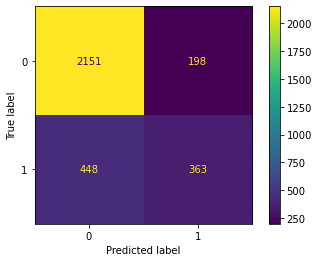

In [33]:
confusion_matrix(y_test,y_test_pred)
cmx = confusion_matrix(y_test,y_test_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cmx)
disp.plot();

In [21]:
df['Churn'].value_counts()

No     5164
Yes    1857
Name: Churn, dtype: int64

In [22]:
df.head(10)

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,1,29.85,No
1,0,34,56.95,No
2,0,2,53.85,Yes
3,0,45,42.30,No
4,0,2,70.70,Yes
5,0,8,99.65,Yes
6,0,22,89.10,No
7,0,10,29.75,No
8,0,28,104.80,Yes
9,0,62,56.15,No


In [23]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Even a simple model will give us more than 70% accuracy. Why?

The data is not balanced, so we have more 'No' than 'Yes'. So the model is learning how to predict 'No', we need to balance it to the model learn how to predict the 'Yes'. 

For the company, predicting 'No' is useless, because they want to know actually why people are churning.

# Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
sm = SMOTE(random_state=42) # is going to resample the data using nearest neighbort to construct synthetic samples
X_sm, y_sm = sm.fit_resample(X,y)

In [26]:
y_sm.value_counts()

Churn
Yes      5164
No       5164
dtype: int64

In [27]:
## Train Test split

X_train_sm,X_test_sm,y_train_sm,y_test_sm=train_test_split(X_sm,y_sm,test_size=0.45,random_state=40)

## Define and apply Model - logistic regression to classify 

classification=LogisticRegression(max_iter=500)

classification.fit(X_train_sm,y_train_sm)

y_test_pred_sm=classification.predict(X_test_sm)

accuracy_score(y_test_sm, y_test_pred_sm)

C:\Users\Raphael Costa\anaconda3\envs\class1\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.7198795180722891

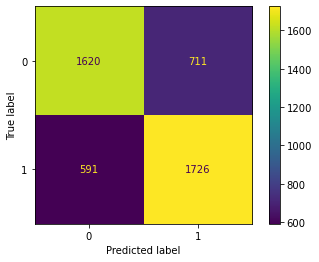

In [34]:
confusion_matrix(y_test_sm,y_test_pred_sm)
cmx = confusion_matrix(y_test_sm,y_test_pred_sm)
disp=ConfusionMatrixDisplay(confusion_matrix=cmx)
disp.plot();

# Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [28]:
from imblearn.under_sampling import TomekLinks

In [29]:
tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X, y)

In [30]:
y_tl.value_counts()

Churn
No       4704
Yes      1857
dtype: int64

In [31]:
## Train Test split

X_train_tl,X_test_tl,y_train_tl,y_test_tl=train_test_split(X_tl,y_tl,test_size=0.45,random_state=40)

## Define and apply Model - logistic regression to classify 

classification=LogisticRegression(max_iter=500)

classification.fit(X_train_tl,y_train_tl)

y_test_pred_tl=classification.predict(X_test_tl)

accuracy_score(y_test_tl, y_test_pred_tl)

C:\Users\Raphael Costa\anaconda3\envs\class1\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.7893667456823569

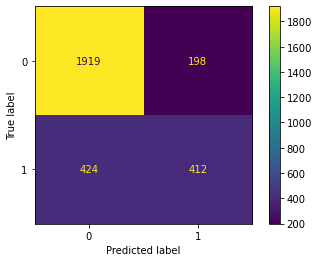

In [35]:
confusion_matrix(y_test_tl,y_test_pred_tl)
cmx = confusion_matrix(y_test_tl,y_test_pred_tl)
disp=ConfusionMatrixDisplay(confusion_matrix=cmx)
disp.plot();

There is an improvement, but the data still imbalanced after using the tl. Almost 400 'No' were deleted, but still one gap between the 'No' and 'Yes' values. The accuracy increased if you compare with the SMOTE, although the model is better to predict 'No' than 'Yes'. 